# Aprendiendo Machine Learning con Python 

Luego de desarrollar modelos de aprendizajes supervisados, veremos como aptimizarlo y evaluarlo con la metodología adecuada. 

Validar un modelo con la técnica de validación cruzada.

Mejorar el modelo con y la curva de aprendizaje. 

___

En principio, importemos las librerías y los DataFrames con las que vamos a trabajar.

**Recordemos el ejercicio** - Predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. [Fuente](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv)

Estos DataFrames fueron tratados en el Notebook [preparacion_datos](https://github.com/bonaldee/ProyectoModelado_ElianaBonalde/blob/main/preparacion_datos.ipynb).

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsRegressor


X_train = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_entrenamiento.csv')
y_train = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_entren_prediccion.csv')
X_test = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_test.csv')
y_test = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_test_prediccion.csv')

In [74]:
mo_KN = KNeighborsRegressor()
mo_KN = mo_KN.fit(X_train, y_train)

#### Cross-validation

La validación cruzada [scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) consiste en entrenar y luego validar nuestro modelo en varios cortes del conjunto de entrenamiento, el cual se divide en k conjuntos más pequeños y se les aplica el siguiente procedimiento:

- Un modelo se entrena usando k-1 cortes como datos de entrenamiento.
- El otro corte se utiliza como un conjunto de pruebas para calcular una medida de rendimiento como la precisión.

Este enfoque puede ser computacionalmente costoso, pero no desperdicia demasiados datos, siendo una gran ventaja para muestras muy pequeñas. 

___
A continuación, en nuestro conjunto de datos de entrenamiento, ajustamos el modelo de KNeighbors, calculando la puntuación 5 veces consecutivas.

Utilizaremos la funcion `cross_val_score` con los siguientes parámetros: `modelo`, `X`, `y` y `cv` que nos congigura el número de divisiones. 

In [75]:
from sklearn.model_selection import cross_val_score
cross_KN = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=5)
print(cross_KN, cross_KN.mean())

[0.98467376 0.97162129 0.99691379 0.99824401 0.98707704] 0.9877059776282238


Evaluamos diferentes valores de n_neighbors para escoger cuál tiene el mejor rendimiento. 

Text(0.5, 0, 'n_neighbors')

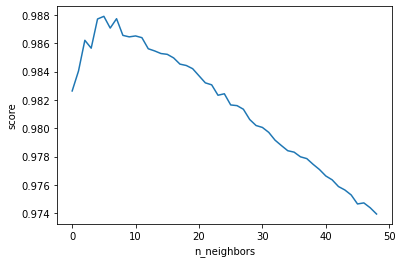

In [76]:
val_score=[]
for n in range (1,50):
    cross_KN = cross_val_score(KNeighborsRegressor(n), X_train, y_train, cv=5).mean()
    val_score.append(cross_KN)
    
plt.plot(val_score)
plt.ylabel('score')
plt.xlabel('n_neighbors')

In [77]:
mo_KN = KNeighborsRegressor(n_neighbors=5)
mo_KN = mo_KN.fit(X_train, y_train)
print(mo_KN.score(X_test, y_test))

0.9885697974541406


Podemos ver que obtenemos el mejor rendimiento cuando el número de vecinos están cerca de 5. El código anterior lo podemos sustituir por la función `validation_curve` de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html?highlight=validation_curve#sklearn.model_selection.validation_curve), la cual permite crear este tipo de gráficos.

Utilizamos los siguientes parámetros: `modelo`, `X`, `y`, `param_name` y `param_range` que representan el nombre del parámetro que se modificará y valores del parámetro que se evaluará, respectivamente; y `cv`.

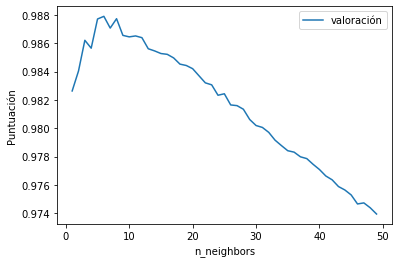

In [78]:
from sklearn.model_selection import validation_curve
k = np.arange(1, 50)
train_score, val_score = validation_curve(mo_KN, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='valoración')
plt.ylabel('Puntuación')
plt.xlabel('n_neighbors')
plt.legend()

Con las curvas de aprendizaje, podría saber si nuestro modelo tiene un mejor rendimiento si le proporcionamos más datos. Éstas muestran la evolución del desempeño en función de la cantidad de datos que se le proporciones. Normalmente, mientras más datos, mejor es su rendimiento. 

Utilizaremos la función `learning_curve` de [scikit_learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html?highlight=learning%20curve#sklearn.model_selection.learning_curve), usando los siguinetes parámetros: `modelo`, `X`, `y`, `cv` y `train_sizes` que representa números relativos o absolutos de ejemplos de formación que se utilizarán para generar la curva de aprendizaje.

In [79]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(mo_KN, X_train, y_train, train_sizes=np.linspace(0.2, 1, 5), cv=5 )
print(N)

[ 628 1256 1884 2512 3141]


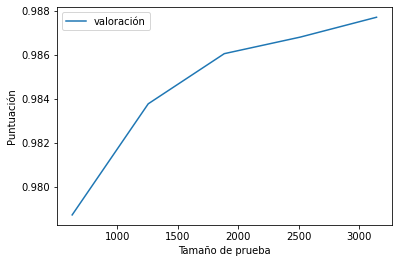

In [80]:
plt.plot(N, val_score.mean(axis=1), label='valoración')
plt.ylabel('Puntuación')
plt.xlabel('Tamaño de prueba')
plt.legend()